In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

In [15]:
#growth_data_ = pd.read_csv(r"C:\Users\Dani\OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES\Dokumente\WU\Bachelorarbeit\02 Code\02 Data Processing\clustering_data_growth.csv")
#value_data_ = pd.read_csv(r"C:\Users\Dani\OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES\Dokumente\WU\Bachelorarbeit\02 Code\02 Data Processing\clustering_data_value.csv")
universe_data_ = pd.read_csv(r"C:\Users\Dani\OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES\Dokumente\WU\Bachelorarbeit\02 Code\02 Data Processing\clustering_data.csv")

In [16]:
#growth_data = growth_data_
#value_data = value_data_
universe_data = universe_data_.copy()

In [17]:
universe_data.columns

Index(['Unnamed: 0', 'GV_Key', 'Date_cal', 'Ticker Symbol', 'Company Name',
       'Quarter', 'Fiscal Data Year and Quarter', 'Final Date', 'Date_rep',
       'Assets', 'Cash', 'Long-Term Debt', 'Invested Capital', 'Liabilities',
       'Net Income', 'EBIT', 'EBITDA', 'Revenue', 'Stockholders Equity', 'HQ',
       'Share_Price', 'Share_Price_BD', 'Div_Per_Share_Ann', 'Div_Yield',
       'Market_Cap', 'Beta_1Y', 'Beta_2Y', 'Beta_5Y', 'Rev_1y_Growth',
       'Rev_2y_Growth', 'Primary Industry', 'Industry Sector',
       'Industry Group', 'Industry', 'Shares_out', 'EBIT_Margin',
       'EBITDA_Margin', 'Profit_Margin', 'Leverage', 'Debt/Assets',
       'Cash/Assets', 'ROE', 'P/B', 'P/Sales', 'P/EBITDA', 'P/EBIT', 'P/E',
       'Universe'],
      dtype='object')

In [18]:
for quarter in universe_data.Quarter.unique().tolist():
    print(quarter, ":", len(universe_data[universe_data.Quarter ==quarter].GV_Key.unique().tolist()))

2017Q1 : 1060
2017Q2 : 1071
2017Q3 : 1074
2017Q4 : 1085
2018Q1 : 1094
2018Q2 : 1100
2018Q3 : 1113
2018Q4 : 1120
2019Q1 : 1128
2019Q2 : 1146
2019Q3 : 1154
2019Q4 : 1156
2020Q1 : 1166
2020Q2 : 1171
2020Q3 : 1194
2020Q4 : 1225
2021Q1 : 1263
2021Q2 : 1323
2021Q3 : 1399
2021Q4 : 1456
2022Q1 : 1468
2022Q2 : 1478
2022Q3 : 1490
2022Q4 : 1470


# Feature selection

In [19]:
len(universe_data.GV_Key.unique())

1528

In [20]:
#after conducting correlation analysis (variables with corr > 0.9 were removed)
universe_data.drop(['Liabilities', 'EBIT_Margin'], axis = 1, inplace = True)

In [21]:
universe_data.head()

,Unnamed: 0,GV_Key,Date_cal,Ticker Symbol,Company Name,Quarter,Fiscal Data Year and Quarter,Final Date,Date_rep,Assets,...,Leverage,Debt/Assets,Cash/Assets,ROE,P/B,P/Sales,P/EBITDA,P/EBIT,P/E,Universe
0,0,GV_001076,2017-03-31,PRG,PROG HOLDINGS INC,2017Q1,2017Q1,2017-05-16,2017-04-28,2624.484,...,0.184690,0.428386,0.132784,0.035529,1.706586,2.541843,4.578281,24.888109,40.276245,Value
1,1,GV_001076,2017-06-30,PRG,PROG HOLDINGS INC,2017Q2,2017Q2,2017-08-13,2017-07-28,2548.130,...,0.157415,0.394822,0.102167,0.023562,2.178355,3.453030,6.415589,38.090930,77.513235,Value
2,2,GV_001076,2017-09-30,PRG,PROG HOLDINGS INC,2017Q3,2017Q3,2017-10-30,2017-10-27,2595.004,...,0.143619,0.393467,0.048652,0.016100,1.759674,2.768258,5.368843,50.491260,91.639814,Value
3,3,GV_001076,2017-12-31,PRG,PROG HOLDINGS INC,2017Q4,2017Q4,2018-03-14,2018-02-15,2692.264,...,0.100884,0.358160,0.018957,0.102754,1.793223,2.933589,5.565334,37.422952,14.615522,Value
4,4,GV_001076,2018-03-31,PRG,PROG HOLDINGS INC,2018Q1,2018Q1,2018-05-16,2018-04-26,2719.009,...,0.131856,0.354106,0.069661,0.029750,1.695942,2.610930,4.677097,35.167794,47.715412,Value


In [22]:
universe_data.columns.T

Index(['Unnamed: 0', 'GV_Key', 'Date_cal', 'Ticker Symbol', 'Company Name',
       'Quarter', 'Fiscal Data Year and Quarter', 'Final Date', 'Date_rep',
       'Assets', 'Cash', 'Long-Term Debt', 'Invested Capital', 'Net Income',
       'EBIT', 'EBITDA', 'Revenue', 'Stockholders Equity', 'HQ', 'Share_Price',
       'Share_Price_BD', 'Div_Per_Share_Ann', 'Div_Yield', 'Market_Cap',
       'Beta_1Y', 'Beta_2Y', 'Beta_5Y', 'Rev_1y_Growth', 'Rev_2y_Growth',
       'Primary Industry', 'Industry Sector', 'Industry Group', 'Industry',
       'Shares_out', 'EBITDA_Margin', 'Profit_Margin', 'Leverage',
       'Debt/Assets', 'Cash/Assets', 'ROE', 'P/B', 'P/Sales', 'P/EBITDA',
       'P/EBIT', 'P/E', 'Universe'],
      dtype='object')

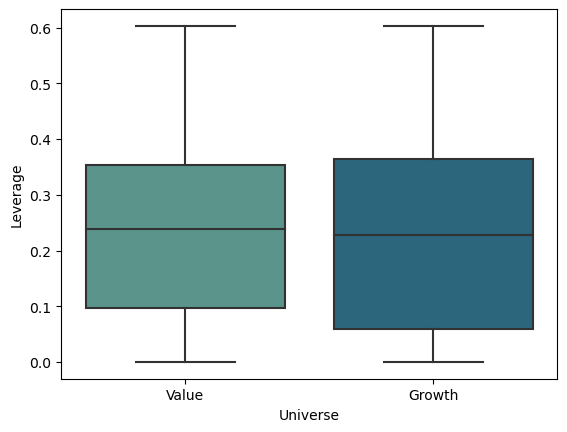

In [23]:
g_data = universe_data[universe_data.Universe == 'Growth']
v_data = universe_data[universe_data.Universe == 'Value']

plot_data = universe_data[(universe_data['Leverage'] <= universe_data['Leverage'].quantile(0.95)) & (universe_data['Leverage'] >= universe_data['Leverage'].quantile(0.05))]
ax = sns.boxplot(data=plot_data, y = 'Leverage', x='Universe', palette="crest")

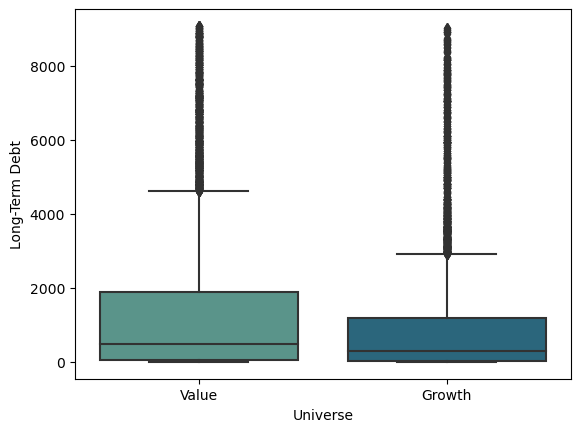

In [24]:
plot_data = universe_data[(universe_data['Long-Term Debt'] <= universe_data['Long-Term Debt'].quantile(0.95)) & (universe_data['Long-Term Debt'] >= universe_data['Long-Term Debt'].quantile(0.05))]
ax = sns.boxplot(data=plot_data, y = 'Long-Term Debt', x='Universe', palette="crest")

# Scaling

In [25]:
#before scaling

distributions = universe_data.describe()
distributions.to_clipboard()

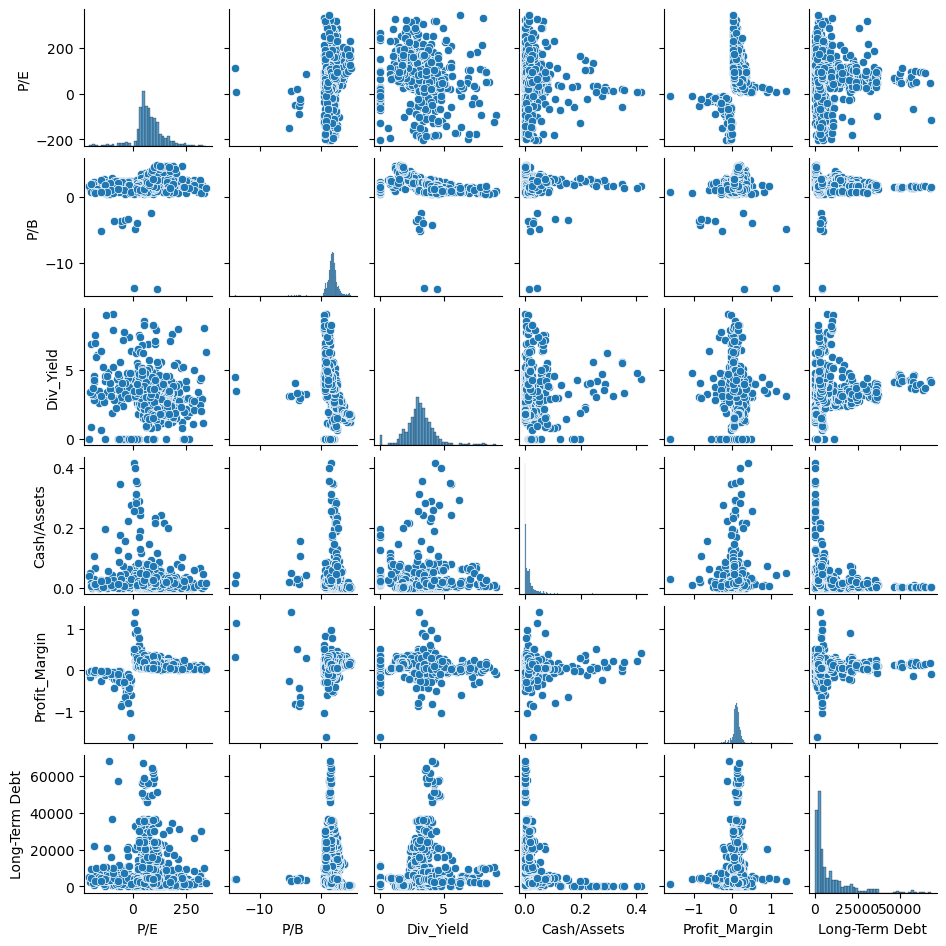

In [26]:
from pandas.plotting import scatter_matrix

plot_data = universe_data[(universe_data['P/E'] <= universe_data['P/E'].quantile(0.95)) & (universe_data['P/E'] >= universe_data['P/E'].quantile(0.05))]

columns_to_cluster_v = ['P/E', 'P/B', 'Div_Yield', 'Cash/Assets', 'Profit_Margin', 'Long-Term Debt']
columns_to_cluster_g = ['P/E', 'Rev_1y_Growth', 'ROE', 'Beta', 'Leverage', 'Invested Capital']

g_data = plot_data[plot_data.Universe == 'Growth']
v_data = plot_data[(plot_data.Universe == 'Value') & (plot_data['Industry Group'] == 'Utilities')]


#sns.histplot(v_data[columns_to_cluster_v]['P/E'], palette = "crest")
sns.pairplot(v_data[columns_to_cluster_v], palette = "crest", diag_kind = "hist", height = 1.6) #, aspect = 8/6)
#plt.title('Distributions of Value features for Value stocks, filtered for Industry Group "Utilities"')
plt.show()

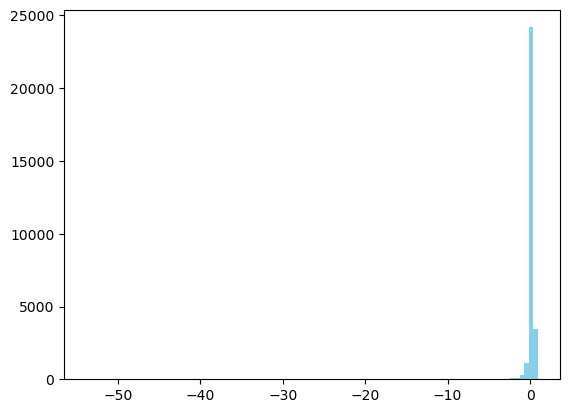

In [27]:
#depicting the distributions

col = universe_data['EBITDA_Margin']
#palette = sns.color_palette("crest", len(universe_counts))
plt.hist(col, bins = 100, color = 'skyblue')
plt.show()

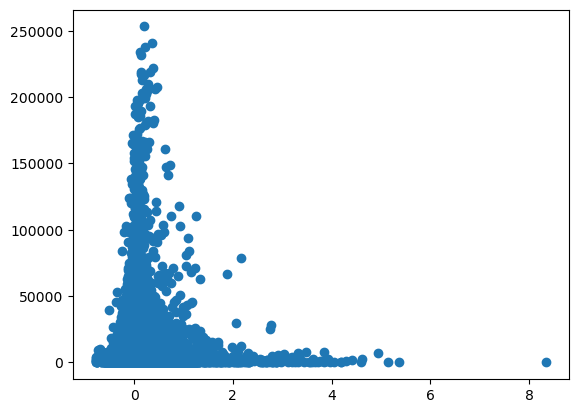

In [28]:
# clustering with growth and P/B features, unscaled

x = universe_data['Rev_1y_Growth']
y = universe_data['Market_Cap']

plt.scatter(x, y)
plt.show()

In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

numerical_features = ['Assets','Cash','Long-Term Debt','Invested Capital','Net Income','EBIT','EBITDA','Revenue','Stockholders Equity',
                      'Share_Price','Div_Per_Share_Ann','Div_Yield','Market_Cap','Beta_1Y','Beta_2Y','Beta_5Y',
                      'Rev_1y_Growth','Rev_2y_Growth','Shares_out','EBITDA_Margin','Profit_Margin','Leverage',
                      'Debt/Assets','Cash/Assets','ROE','P/B','P/Sales','P/EBITDA','P/EBIT','P/E']


universe_data_scaled_robust = universe_data.copy()
universe_data_scaled_robust[numerical_features] = scaler.fit_transform(universe_data_scaled_robust[numerical_features])


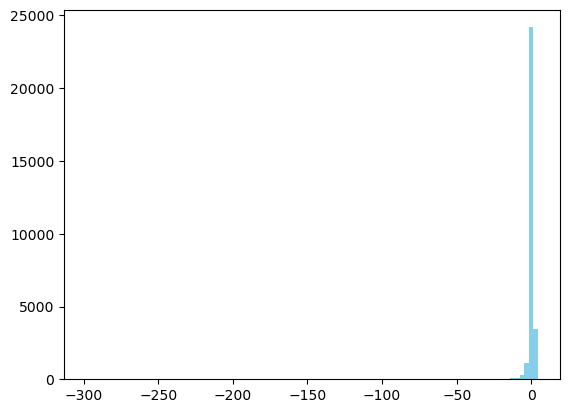

In [30]:
#depicting the distributions

col = universe_data_scaled_robust['EBITDA_Margin']
#palette = sns.color_palette("crest", len(universe_counts))
plt.hist(col, bins = 100, color = 'skyblue')
plt.show()

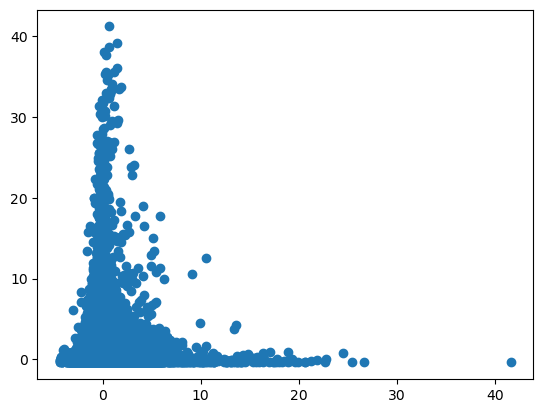

In [31]:
# clustering with growth and P/B features, scaled with robust scaler

x = universe_data_scaled_robust['Rev_1y_Growth']
y = universe_data_scaled_robust['Market_Cap']

plt.scatter(x, y)
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_features = ['Assets','Cash','Long-Term Debt','Invested Capital','Net Income','EBIT','EBITDA','Revenue','Stockholders Equity',
                      'Share_Price','Div_Per_Share_Ann','Div_Yield','Market_Cap','Beta_1Y','Beta_2Y','Beta_5Y',
                      'Rev_1y_Growth','Rev_2y_Growth','Shares_out','EBITDA_Margin','Profit_Margin','Leverage',
                      'Debt/Assets','Cash/Assets','ROE','P/B','P/Sales','P/EBITDA','P/EBIT','P/E']

universe_data_scaled_minmax = universe_data.copy()
universe_data_scaled_minmax[numerical_features] = scaler.fit_transform(universe_data_scaled_minmax[numerical_features])

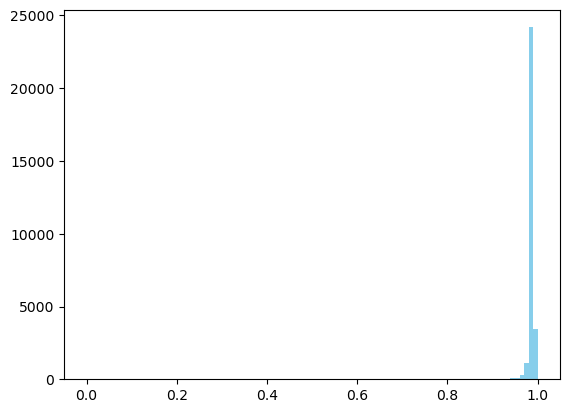

In [33]:
#depicting the distributions

col = universe_data_scaled_minmax['EBITDA_Margin']
#palette = sns.color_palette("crest", len(universe_counts))
plt.hist(col, bins = 100, color = 'skyblue')
plt.show()

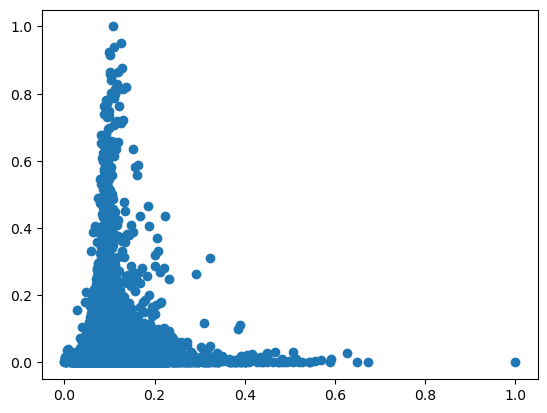

In [34]:
# clustering with growth and P/B features, scaled with minmax scaler

x = universe_data_scaled_minmax['Rev_1y_Growth']
y = universe_data_scaled_minmax['Market_Cap']

plt.scatter(x, y)
plt.show()

In [35]:
universe_data_scaled_robust.describe()

,Unnamed: 0,Assets,Cash,Long-Term Debt,Invested Capital,Net Income,EBIT,EBITDA,Revenue,Stockholders Equity,...,Profit_Margin,Leverage,Debt/Assets,Cash/Assets,ROE,P/B,P/Sales,P/EBITDA,P/EBIT,P/E
count,29404.000000,2.940400e+04,29404.000000,29404.000000,2.940400e+04,29404.000000,2.940400e+04,2.940400e+04,29404.000000,2.940400e+04,...,29404.000000,2.940400e+04,2.940400e+04,29404.000000,29404.000000,2.940400e+04,2.940400e+04,2.940400e+04,2.940400e+04,29404.000000
mean,14701.500000,7.930852e-01,0.840983,0.763146,7.014823e-01,0.757661,7.112869e-01,6.867884e-01,0.715563,7.817421e-01,...,-0.837348,3.302906e-02,-3.084191e-02,0.366325,-0.186827,4.258607e-01,9.158510e-01,-2.917882e-02,1.122748e-01,0.104443
std,8488.347994,2.522888e+00,2.893722,2.177361,2.057578e+00,2.733818,2.055375e+00,1.920559e+00,2.272138,2.391340e+00,...,10.677934,6.823089e-01,7.248709e-01,1.086125,2.625257,1.748597e+00,6.324763e+00,6.289664e+00,6.195582e+00,4.833876
min,0.000000,-3.410517e-01,-0.355143,-0.242222,-3.575307e-01,-14.562203,-3.338632e+00,-1.834501e+00,-0.368119,-1.426005e+00,...,-775.241399,-8.706175e-01,-1.710714e+00,-0.579240,-53.272859,-1.758180e+01,-6.056729e-01,-1.427805e+02,-1.310435e+02,-76.445108
25%,7350.750000,-2.438185e-01,-0.258130,-0.216011,-2.522983e-01,-0.223703,-2.412061e-01,-2.545033e-01,-0.258662,-2.753923e-01,...,-0.455885,-5.494881e-01,-5.284051e-01,-0.351390,-0.493959,-3.572548e-01,-3.157335e-01,-4.017318e-01,-4.084525e-01,-0.464277
50%,14701.500000,1.902097e-17,0.000000,0.000000,-2.774880e-17,0.000000,2.812149e-17,2.028136e-17,0.000000,-2.909728e-17,...,0.000000,-4.844859e-17,1.852038e-16,0.000000,0.000000,7.630920e-17,4.495373e-17,-4.766424e-17,-6.479124e-17,0.000000
75%,22052.250000,7.561815e-01,0.741870,0.783989,7.477017e-01,0.776297,7.587939e-01,7.454967e-01,0.741338,7.246077e-01,...,0.544115,4.505119e-01,4.715949e-01,0.648610,0.506041,6.427452e-01,6.842665e-01,5.982682e-01,5.915475e-01,0.535723
max,29403.000000,3.567031e+01,63.507491,34.212407,2.888347e+01,53.033051,2.775182e+01,2.211251e+01,48.572132,2.880764e+01,...,16.383135,3.771030e+00,4.092118e+00,6.303900,51.265589,2.991285e+01,4.134323e+02,1.647164e+02,1.302219e+02,101.082772


In [36]:
universe_data_scaled_minmax.describe()

,Unnamed: 0,Assets,Cash,Long-Term Debt,Invested Capital,Net Income,EBIT,EBITDA,Revenue,Stockholders Equity,...,Profit_Margin,Leverage,Debt/Assets,Cash/Assets,ROE,P/B,P/Sales,P/EBITDA,P/EBIT,P/E
count,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,...,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000
mean,14701.500000,0.031494,0.018730,0.029179,0.036217,0.226641,0.130262,0.105286,0.022143,0.073023,...,0.978247,0.194682,0.289492,0.137374,0.507813,0.379151,0.003675,0.464237,0.502002,0.431197
std,8488.347994,0.070058,0.045312,0.063195,0.070366,0.040444,0.066110,0.080200,0.046427,0.079095,...,0.013489,0.146997,0.124917,0.157795,0.025113,0.036817,0.015276,0.020454,0.023714,0.027229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7350.750000,0.002700,0.001519,0.000761,0.003599,0.212123,0.099626,0.065979,0.002237,0.038057,...,0.978729,0.069184,0.203747,0.033103,0.504875,0.362663,0.000700,0.463025,0.500009,0.427994
50%,14701.500000,0.009471,0.005561,0.007030,0.012227,0.215432,0.107384,0.076607,0.007522,0.047166,...,0.979304,0.187566,0.294807,0.084153,0.509601,0.370185,0.001463,0.464332,0.501572,0.430609
75%,22052.250000,0.030469,0.017178,0.029784,0.037797,0.226917,0.131790,0.107738,0.022670,0.071133,...,0.979992,0.284625,0.376077,0.178385,0.514441,0.383718,0.003116,0.466277,0.503836,0.433627
max,29403.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
universe_data.describe()

,Unnamed: 0,Assets,Cash,Long-Term Debt,Invested Capital,Net Income,EBIT,EBITDA,Revenue,Stockholders Equity,...,Profit_Margin,Leverage,Debt/Assets,Cash/Assets,ROE,P/B,P/Sales,P/EBITDA,P/EBIT,P/E
count,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,...,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000
mean,14701.500000,6783.742867,450.185777,1982.366004,4329.847712,77.730735,125.028192,175.715680,1013.039357,2331.037906,...,-0.038034,0.258845,0.540902,0.124534,0.016478,3.710139,15.171240,29.787319,47.120537,65.127314
std,8488.347994,15076.560915,1088.926468,4293.280549,8429.790688,215.161695,259.655012,336.436781,2123.740161,4671.513000,...,1.227502,0.195444,0.217267,0.142901,0.126104,5.088070,62.467531,234.375592,339.718761,456.436233
min,0.000000,6.239000,0.076000,0.000000,-8.874000,-1128.000000,-386.597000,-265.955000,0.135000,-1981.825000,...,-89.061100,0.000000,0.037391,0.000127,-2.533512,-48.688559,0.143666,-5289.643333,-7144.465833,-7163.023975
25%,7350.750000,587.296250,36.582500,51.680750,422.257750,0.493750,4.700000,10.823500,102.443250,265.912000,...,0.005818,0.091986,0.391767,0.030105,0.001725,1.431429,3.007298,15.904650,18.567800,11.426247
50%,14701.500000,2044.334500,133.718500,477.608000,1455.911000,18.100000,35.171500,55.406500,344.211500,803.894500,...,0.058225,0.249384,0.550147,0.076337,0.025452,2.470969,6.125691,30.874627,40.964240,55.265384
75%,22052.250000,6563.209250,412.889000,2023.462250,4519.206250,79.197500,131.029750,186.000000,1037.131250,2219.425000,...,0.120775,0.378430,0.691499,0.161674,0.049760,4.341230,12.883958,53.168264,73.400221,105.850725
max,29403.000000,215207.000000,24032.000000,67937.000000,119790.000000,4192.000000,3541.052000,3928.999000,45744.000000,57080.000000,...,1.941579,1.329574,1.776685,0.905736,2.487996,89.511395,4089.456168,6168.801741,7181.348333,9599.953275


In [38]:
universe_data_scaled_robust.to_csv("clustering_data_scaled_robust.csv")

In [39]:
universe_data_scaled_minmax.to_csv("clustering_data_scaled_minmax.csv")

In [40]:
universe_data.to_csv("clustering_data_unscaled.csv")

In [41]:
universe_data_scaled_robust.columns

Index(['Unnamed: 0', 'GV_Key', 'Date_cal', 'Ticker Symbol', 'Company Name',
       'Quarter', 'Fiscal Data Year and Quarter', 'Final Date', 'Date_rep',
       'Assets', 'Cash', 'Long-Term Debt', 'Invested Capital', 'Net Income',
       'EBIT', 'EBITDA', 'Revenue', 'Stockholders Equity', 'HQ', 'Share_Price',
       'Share_Price_BD', 'Div_Per_Share_Ann', 'Div_Yield', 'Market_Cap',
       'Beta_1Y', 'Beta_2Y', 'Beta_5Y', 'Rev_1y_Growth', 'Rev_2y_Growth',
       'Primary Industry', 'Industry Sector', 'Industry Group', 'Industry',
       'Shares_out', 'EBITDA_Margin', 'Profit_Margin', 'Leverage',
       'Debt/Assets', 'Cash/Assets', 'ROE', 'P/B', 'P/Sales', 'P/EBITDA',
       'P/EBIT', 'P/E', 'Universe'],
      dtype='object')

In [70]:
len(universe_data_scaled_robust['Industry Group'].unique())

24

In [72]:
len(universe_data_scaled_robust['Primary Industry'].unique())

146

In [77]:
# for initial testing

first_hun = universe_data_scaled_robust.GV_Key.unique().tolist()[:100] #first 100 companies
#now filter for these companies
universe_data_scaled_hun = universe_data_scaled_robust[universe_data_scaled_robust.GV_Key.isin(first_hun) == 1]
universe_data_scaled_hun.to_csv("clustering_data_scaled_hun.csv")

In [78]:
len(universe_data_scaled_hun.GV_Key.unique().tolist())
len(universe_data_scaled_hun['Industry Group'].unique())

21